In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.decomposition.pca import PCA

In [2]:
seed = 123
np.random.seed(seed)  # for reproducibility


xl = pd.ExcelFile("data.xlsx")
df = xl.parse(xl.sheet_names[0])
df.head()

#%%
disciplinas = np.unique(df.disciplina)

disciplinas_dict = {}
for i,it in enumerate(disciplinas):
    disciplinas_dict[i]=it
    disciplinas_dict[it]=i

#dict = { 0:1, 1:2, 10:3, 11:4, 20:5, 21:6, 30:7, 31:8, 40:9, 41:10, }
aluno_map_dict = {  }
c = 0
for p in range(0,300,10):
    aluno_map_dict[p] = c
    aluno_map_dict[p+1] = c+1
    c += 2


#%%

In [3]:
def converte_periodo_cod(cod_inicio,cod_fim):
    def converte_periodo(ano_inicial,semestre_inicial,ano_final,semestre_final):
        anos = ano_final-ano_inicial    
        return 2*anos + semestre_final-semestre_inicial
        
    ano_inicial      = int(str(cod_inicio)[0:4])
    ano_final        = int(str(cod_fim)[0:4])
    semestre_inicial = int(str(cod_inicio)[4:])
    semestre_final   = int(str(cod_fim)[4:])
    
    periodos_totais = converte_periodo(ano_inicial,semestre_inicial,ano_final,semestre_final)
    
    print(ano_inicial,ano_final,semestre_inicial,semestre_final,periodos_totais)
    return periodos_totais

converte_periodo_cod('20061','20061')
converte_periodo_cod('20061','20062')
converte_periodo_cod('20061','20071')
converte_periodo_cod('20061','20072')
converte_periodo_cod('20061','20081')
converte_periodo_cod('20061','20082')

2006 2006 1 1 0
2006 2006 1 2 1
2006 2007 1 1 2
2006 2007 1 2 3
2006 2008 1 1 4
2006 2008 1 2 5


5

In [4]:
def create_aluno_array(id_aluno,max_periodos = 8):

    aluno = {}

    aluno_df = df[df.aluno == id_aluno]

    aluno_concluiu = aluno_df.concluiu.values[0]
    aluno_ano_inicio = np.min(aluno_df.periodo.values)
    aluno_periodo = [converte_periodo_cod(aluno_ano_inicio,p)   for p in aluno_df.periodo.values]

    aluno_periodo = np.array(aluno_periodo)
    aluno_disciplinas = aluno_df.disciplina.values
    aluno_notas = aluno_df.nota.values

    aluno['aluno_concluiu'] = aluno_concluiu

    print(aluno_concluiu)
    print(aluno_disciplinas)
    print(aluno_notas)
    print(aluno_periodo)

    aluno_dict = {}
    for i in range(max_periodos):
        ids = np.where(aluno_periodo == i)[0]
        print(ids)
        aluno_dict[i] = [[aluno_disciplinas[ii], aluno_notas[ii]] for ii in ids]

    print(aluno_dict)
    aluno['periodos'] = aluno_dict
    
    
    def create_aluno_matrix(aluno_dict, disciplinas, disciplinas_dict, max_periodos=8):
        aluno_matrix = np.zeros((max_periodos, len(disciplinas))) - 1
        for per in range(max_periodos):
            for it in aluno_dict['periodos'][per]:
                aluno_matrix[per, disciplinas_dict[it[0]]] = it[1]  # matrix recebe nota na posicao correta
    
        return aluno_matrix

    aluno_matrix = create_aluno_matrix(aluno, disciplinas, disciplinas_dict, max_periodos=8)
    aluno['matrix'] = aluno_matrix
    
    return aluno

In [ ]:
alunos = np.unique(df.aluno)
len(alunos)

X = []
Y = []

for aluno in alunos:
    aluno_dict = create_aluno_array(aluno)
    X.append(aluno_dict['matrix'].ravel())    
    Y.append(aluno_dict['aluno_concluiu'])

X = np.array(X)

2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2006 1 2 3
2005 2005 1 1 0
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 2 3
2005 2007 1 2 5
2005 2007 1 2 5
0
['GMA06076' 'GGM04080' 'GMA04075' 'GGT02001' 'GGM04081' 'GGT02001'
 'GMA04075' 'GGM04080' 'GGM04081' 'GAN04071' 'GMA06076' 'GAN04071'
 'GGM04082' 'GGM04082' 'GGM04082' 'GAN04071']
[68 65 64 64 60 43 43 40 27 12 10  0  0  0  0  0]
[1 1 1 1 1 0 0 0 0 3 0 2 2 3 5 5]
[ 5  6  7  8 10]
[0 1 2 3 4]
[11 12]
[ 9 13]
[]
[14 15]
[]
[]
{0: [['GGT02001', 43], ['GMA04075', 43], ['GGM04080', 40], ['GGM04081', 27], ['GMA06076', 10]], 1: [['GMA06076', 68], ['GGM04080', 65], ['GMA04075', 64], ['GGT02001', 64], ['GGM04081', 60]], 2: [['GAN04071', 0], ['GGM04082', 0]], 3: [['GAN04071', 12], ['GGM04082', 0]], 4: [], 5: [['GGM04082', 0], ['GAN04071', 0]], 6: [], 7: []}
2005 2007 1 1 4
2005 2005 1 2 1
2005 2006 1 2 3
2005 2005 1 1 0
2005 2005 1 1 0
2005 2

2005 2006 2 2 2
2005 2006 2 2 2
2005 2008 2 1 5
2005 2008 2 2 6
2005 2005 2 2 0
2005 2006 2 1 1
2005 2006 2 1 1
2005 2006 2 2 2
2005 2006 2 1 1
2005 2005 2 2 0
2005 2005 2 2 0
2005 2008 2 2 6
2005 2006 2 1 1
2005 2005 2 2 0
2005 2006 2 2 2
2005 2007 2 1 3
0
['SFP04013' 'SSE00228' 'GGM04088' 'GAN04061' 'GFI00158' 'GGT02001'
 'GMA04075' 'GMA00108' 'TCC03063' 'GGM04080' 'GMA04075' 'GGT02001'
 'GMA06076' 'GGM04081' 'GMA04075' 'GGT02001' 'GMA00109' 'GMA06076'
 'GMA06076' 'GGM04082' 'GAN04071']
[90 72 70 68 61 60 60 60 60 52 52 52 43 40 18 18 18 14  0  0  0]
[3 5 1 6 6 2 2 5 6 0 1 1 2 1 0 0 6 1 0 2 3]
[ 9 14 15 18]
[ 2 10 11 13 17]
[ 5  6 12 19]
[ 0 20]
[]
[1 7]
[ 3  4  8 16]
[]
{0: [['GGM04080', 52], ['GMA04075', 18], ['GGT02001', 18], ['GMA06076', 0]], 1: [['GGM04088', 70], ['GMA04075', 52], ['GGT02001', 52], ['GGM04081', 40], ['GMA06076', 14]], 2: [['GGT02001', 60], ['GMA04075', 60], ['GMA06076', 43], ['GGM04082', 0]], 3: [['SFP04013', 90], ['GAN04071', 0]], 4: [], 5: [['SSE00228', 72], [

2005 2012 1 1 14
2005 2012 1 2 15
2005 2012 1 1 14
2005 2010 1 2 11
2005 2010 1 2 11
2005 2012 1 1 14
2005 2010 1 1 10
2005 2008 1 1 6
2005 2006 1 2 3
2005 2009 1 2 9
2005 2012 1 1 14
2005 2010 1 1 10
2005 2007 1 1 4
2005 2010 1 1 10
2005 2011 1 1 12
2005 2005 1 2 1
2005 2006 1 2 3
2005 2011 1 2 13
2005 2008 1 2 7
2005 2009 1 1 8
2005 2009 1 1 8
2005 2005 1 2 1
2005 2005 1 2 1
2005 2006 1 1 2
2005 2008 1 1 6
2005 2008 1 2 7
2005 2005 1 1 0
2005 2006 1 1 2
2005 2007 1 1 4
2005 2005 1 1 0
0
['SFP04013' 'GGM00167' 'GFI00162' 'GGM00164' 'GGT02002' 'GAN00152'
 'SSE00232' 'GFI00159' 'SSE00230' 'GAN04134' 'GFI00161' 'GMA00119'
 'GMA00112' 'GGM04089' 'GGT02003' 'TCC00163' 'GMA00111' 'SSE00228'
 'GMA06076' 'GAN00156' 'GFI00158' 'GMA00114' 'GGM04082' 'GGM04088'
 'GGM04074' 'GGM04080' 'GGM04081' 'GAN00153' 'GMA00110' 'GAN04072'
 'GAN00155' 'GGT02001' 'GMA04075' 'TCC03063' 'GAN04071' 'GMA00109'
 'GMA04075' 'GMA06076' 'GAN04071' 'GGM04081']
[92 92 92 91 90 90 90 87 85 85 85 84 81 80 80 78 76 75 74 

2005 2006 1 2 3
2005 2006 1 2 3
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
2005 2009 1 1 8
2005 2009 1 1 8
2005 2009 1 1 8
2005 2009 1 1 8
2005 2009 1 1 8
2005 2009 1 1 8
2005 2009 1 2 9
2005 2009 1 2 9
1
['GGT02001' 'GMA04075' 'GMA06076' 'GGM04080' 'GGM04081' 'GMA04075'
 'TCC03063' 'GGM04082' 'GGT02001' 'GAN04071' 'GAN04096' 'SSE00228'
 'GMA06077' 'SSE00229' 'GMA06078' 'GAN04072' 'GFI06109' 'SSE04036'
 'TCC03059' 'GAN06094' 'GGM06087' 'GGT02002' 'GMA04079' 'SFP04013'
 'GAN06122' 'GAN04123' 'GGT06007' 'GGM06076' 'GAN04125' 'GMA04080'
 'GGM04089' 'SSE00228' 'GAN04127' 'GAN04134' 'GGM00164' 'GAN04126'
 'GGM04088' 'GAN00154' 'SSE02052' 'GMA00119' 'GET00060' 'GAN00154'
 

2005 2009 2 2 8
2005 2010 2 2 10
2005 2006 2 2 2
2005 2006 2 2 2
2005 2006 2 2 2
2005 2013 2 1 15
2005 2008 2 1 5
2005 2008 2 1 5
2005 2010 2 2 10
2005 2011 2 1 11
2005 2011 2 1 11
2005 2011 2 2 12
2005 2012 2 2 14
2005 2010 2 2 10
2005 2007 2 1 3
2005 2011 2 1 11
2005 2013 2 1 15
2005 2005 2 2 0
2005 2007 2 2 4
2005 2006 2 1 1
2005 2006 2 1 1
2005 2007 2 1 3
2005 2009 2 2 8
2005 2010 2 2 10
2005 2012 2 2 14
2005 2012 2 2 14
2005 2006 2 1 1
2005 2005 2 2 0
2005 2005 2 2 0
2005 2008 2 2 6
2005 2011 2 2 12
2005 2008 2 2 6
2005 2007 2 1 3
2005 2006 2 1 1
2005 2007 2 2 4
2005 2011 2 1 11
2005 2009 2 1 7
2005 2009 2 2 8
2005 2007 2 2 4
2005 2009 2 2 8
2005 2009 2 2 8
2005 2008 2 1 5
2005 2008 2 1 5
2005 2012 2 1 13
2005 2007 2 1 3
2005 2011 2 2 12
2005 2006 2 2 2
2005 2008 2 2 6
2005 2008 2 2 6
2005 2009 2 1 7
2005 2010 2 1 9
2005 2010 2 2 10
2005 2011 2 1 11
2005 2011 2 2 12
2005 2011 2 2 12
2005 2012 2 1 13
2005 2012 2 2 14
2005 2012 2 2 14
0
['SSE00228' 'SSE00233' 'SSE00230' 'GGT02002' '

2005 2007 2 2 4
2005 2007 2 2 4
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 1 5
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2008 2 2 6
2005 2009 2 1 7
2005 2009 2 1 7
2005 2009 2 1 7
2005 2009 2 1 7
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
1
['GGM04080' 'GGT02001' 'GMA04075' 'TCC03063' 'GGM04081' 'GMA06076'
 'GAN04071' 'GGM04082' 'GMA06076' 'TCC03063' 'GMA06077' 'SFP04013'
 'GAN04096' 'SSE00229' 'GAN04134' 'GAN04071' 'GGM04088' 'GMA06078'
 'GGT02004' 'SSE04036' 'GGT02002' 'GAN04072' 'GAN06094' 'GFI00158'
 'GFI00161' 'GGM00164' 'SSE00228' 'GMA00114' 'GGM04074' 'SSE04128'
 'GAN00152' 'TCC03063' 'GAN00153' 'GMA00119' 'SSE00231' 'GMA06071'
 'GGM04089' 'GGM00167' 'SSE00232' 'TCC03059' 'SSE04083' 'GGT02004'
 'GFI00159' 'SSE00233' 'GFI00162']
[ 41  41  41   0  70  40  25  

2005 2006 1 2 3
2005 2006 1 2 3
2005 2006 1 2 3
2005 2006 1 2 3
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GMA06077'
 'GGM04082' 'GAN04071' 'TCC03063' 'GAN04096' 'GFI06108' 'GMA06078'
 'GAN06094' 'GAN04072' 'GAN04125' 'GAN04129' 'GGT02003' 'GGT06007'
 'GMA04079' 'GAN06122' 'GAN04123' 'GAN04126' 'GGT02002' 'GMA04079'
 'GMA04080' 'TCC03059' 'GAN04124' 'GAN04127' 'GAN06128' 'GFI00159'
 'GFI00162' 'GGM06076']
[73 75 79 79 88 94 94 83 86 86 60 80 73 90 75 80 90 80 51 80 80 91 85 86 73
 60 90 90 70 48 61 93]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 5 5 5 6 6 6]
[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13]
[14 15 16 17 18]
[19 20 21 22 23 24 25]
[26 27 28]
[29 30 31]
[]
{0: [['GGM04080', 73], ['GGM04081', 75], ['GGT02001', 79], ['GMA04075', 79], ['GMA06076', 88]], 1: 

2005 2005 1 1 0
2005 2007 1 1 4
2005 2006 1 2 3
2005 2007 1 1 4
0
['SFP04013' 'SSE00228' 'GGM04080' 'GET04007' 'GGM04081' 'GAN04071'
 'GGT02001' 'GMA04075' 'TCC03063' 'GAN04096' 'GMA06077' 'GAN06094'
 'GGM04082' 'GMA06076' 'GAN04072' 'GFI06108' 'GMA06078' 'GFI06108'
 'GGM04081' 'TCC03059' 'GGM04088' 'GMA04079']
[88 75 72 71 70 69 68 68 65 63 55 55 54 52 52 50 48 44 41 12  0  0]
[4 5 0 3 1 2 0 0 1 2 1 5 2 0 3 2 3 4 0 4 3 4]
[ 2  6  7 13 18]
[ 4  8 10]
[ 5  9 12 15]
[ 3 14 16 20]
[ 0 17 19 21]
[ 1 11]
[]
[]
{0: [['GGM04080', 72], ['GGT02001', 68], ['GMA04075', 68], ['GMA06076', 52], ['GGM04081', 41]], 1: [['GGM04081', 70], ['TCC03063', 65], ['GMA06077', 55]], 2: [['GAN04071', 69], ['GAN04096', 63], ['GGM04082', 54], ['GFI06108', 50]], 3: [['GET04007', 71], ['GAN04072', 52], ['GMA06078', 48], ['GGM04088', 0]], 4: [['SFP04013', 88], ['GFI06108', 44], ['TCC03059', 12], ['GMA04079', 0]], 5: [['SSE00228', 75], ['GAN06094', 55]], 6: [], 7: []}
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
20

2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 2 10
2005 2010 2 2 10
2005 2010 2 2 10
2005 2011 2 1 11
2005 2011 2 1 11
2005 2011 2 1 11
2005 2011 2 1 11
1
['GGM04080' 'GGM04081' 'GGT02001' 'GGM04080' 'GGM04081' 'GGT02001'
 'GMA04075' 'GMA06076' 'GMA06076' 'GAN04071' 'GGM04082' 'GGT02001'
 'GMA04075' 'GEF01063' 'GGM04082' 'GMA06077' 'SFP04013' 'GAN04096'
 'GAN04071' 'GMA06078' 'GAN04072' 'GAN06094' 'GGT02002' 'GGM04088'
 'GGM06087' 'GGT02004' 'SSE04145' 'TCC03063' 'GFI00161' 'GAN00156'
 'GET04007' 'SSE00229' 'GGM00164' 'GFI00158' 'GMA00119' 'GMA00114'
 'GMA06071' 'GAN04134' 'SSE00230' 'TCC03063' 'TCC03059' 'SSE00231'
 'GAN00152' 'GET00121' 'SSE00228' 'GGT02002' 'GFI00158' 'GAN00152'
 'GGM04074' 'SSE00232' 'GGM04089' 'GFI00158' 'SSE00233' 'GAN00152'
 'GFI00162' 'GFI00159' 'GFI00158' 'GAN00153']
[  0   5  29  61  60  41  41  22  70  27   0  60  60 1

2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 2 2
2006 2007 2 2 2
2006 2007 2 2 2
2006 2007 2 2 2
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 2 8
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04080'
 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04082' 'GAN04071'
 'GMA06076' 'TCC03063' 'GAN04072' 'GAN04096' 'GGT02002' 'GMA00109'
 'GMA00110' 'GAN00156' 'GGM04088' 'SFP00087' 'SSE00229' 'GMA00111'
 'TCC03059' 'GFI00158' 'GMA00112' 'GET00121' 'GMA00114' 'SSE00230'
 'GFI00161' 'GFI00158' 'GMA00119' 'SSE00228' 'SSE00231'

2006 2007 1 1 2
2006 2007 1 2 3
2006 2007 1 2 3
2006 2007 1 2 3
2006 2007 1 2 3
2006 2007 1 2 3
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 2 9
2006 2010 1 2 9
2006 2010 1 2 9
2006 2010 1 2 9
2006 2010 1 2 9
2006 2011 1 1 10
2006 2011 1 1 10
2006 2011 1 1 10
2006 2011 1 1 10
2006 2011 1 2 11
2006 2011 1 2 11
2006 2011 1 2 11
2006 2011 1 2 11
2006 2011 1 2 11
2006 2012 1 1 12
2006 2012 1 1 12
2006 2012 1 1 12
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
1
['GMA06076' 'GGM04080' 'GGM04081' 'GMA04075' 'GGT0200

2006 2009 1 2 7
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2009 1 2 7
0
['GGM04080' 'GGM04082' 'GMA06077' 'GGT02002' 'GAN06094' 'GMA06076'
 'GMA06078' 'GMA04079' 'GGM04081' 'GFI00162' 'GAN04096' 'GFI06108'
 'GFL02002' 'GAN04071' 'GGT02001' 'GMA04075' 'TCC03063' 'GAN04072'
 'GET04007' 'GGM06087' 'TCC03059' 'GAN06122' 'GAN04129' 'GAN00152'
 'GFI00159' 'GAN00152' 'GMA04080' 'GFI00162' 'GFI00159' 'GMA04080']
[95 94 92 90 90 89 89 88 86 86 82 82 80 79 76 76 76 70 70 66 60 49 46 46 21
  0  0  0  0  0]
[0 1 1 2 4 0 2 3 0 7 1 2 7 1 0 0 1 3 4 4 2 4 7 7 7 5 5 5 5 7]
[ 0  5  8 14 15]
[ 1  2 10 13 16]
[ 3  6 11 20]
[ 7 17]
[ 4 18 19 21]
[25 26 27 28]
[]
[ 9 12 22 23 24 29]
{0: [['GGM04080', 95], ['GMA06076', 89], ['GGM04081', 86], ['GGT02001', 76], ['GMA04075', 76]], 1: [['GGM04082', 94], ['GMA06077', 92], ['GAN04096', 82], ['GAN04071', 79], ['TCC03063', 76]], 2: [['GGT02002', 90], ['GMA06078', 89], ['GFI06108', 82], ['TCC03059', 60]], 3: [['GMA04079', 88], ['GAN04072', 7

[]
[]
[]
[]
[]
[]
{0: [['GGM04080', 50], ['GGT02001', 10], ['GMA04075', 10], ['GGM04081', 2], ['GMA06076', 0]], 1: [['GMA04075', 0], ['GGM04081', 0], ['GGT02001', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2006 2008 1 1 4
2006 2008 1 2 5
2006 2006 1 2 1
2006 2006 1 1 0
2006 2006 1 1 0
2006 2008 1 2 5
2006 2006 1 1 0
2006 2006 1 2 1
2006 2009 1 2 7
2006 2009 1 1 6
2006 2007 1 1 2
2006 2007 1 2 3
2006 2008 1 1 4
2006 2008 1 1 4
2006 2009 1 1 6
2006 2006 1 2 1
2006 2009 1 1 6
2006 2006 1 2 1
2006 2007 1 1 2
2006 2007 1 2 3
2006 2006 1 1 0
2006 2007 1 1 2
2006 2007 1 2 3
2006 2008 1 2 5
2006 2009 1 2 7
2006 2008 1 1 4
2006 2009 1 1 6
0
['GFI00161' 'GMA00111' 'GMA06076' 'GMA04075' 'GGT02001' 'GAN04072'
 'GGM04081' 'GGM04080' 'GMA00112' 'GMA00109' 'GMA06077' 'GGM04082'
 'GFI00158' 'GGM04074' 'GAN00156' 'TCC03063' 'TCC03059' 'GAN04071'
 'GGM04082' 'GAN04072' 'GMA06076' 'GAN04096' 'GAN06094' 'GET04007'
 'GET00121' 'GMA06078' 'GMA04079']
[90 89 86 81 81 81 80 78 76 69 68 68 67 62 62 60 60 5

2006 2007 1 2 3
0
['GMA06076' 'GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GGM04082'
 'TCC03063' 'GMA06076' 'GGM04082' 'GAN04071' 'GAN04071' 'GAN04071'
 'GMA06077' 'GMA06077']
[75 68 54 53 53 45 42 40 36 31 21 12  9  0]
[1 0 0 0 0 2 1 0 1 1 3 2 2 3]
[1 2 3 4 7]
[0 6 8 9]
[ 5 11 12]
[10 13]
[]
[]
[]
[]
{0: [['GGM04080', 68], ['GGM04081', 54], ['GGT02001', 53], ['GMA04075', 53], ['GMA06076', 40]], 1: [['GMA06076', 75], ['TCC03063', 42], ['GGM04082', 36], ['GAN04071', 31]], 2: [['GGM04082', 45], ['GAN04071', 12], ['GMA06077', 9]], 3: [['GAN04071', 21], ['GMA06077', 0]], 4: [], 5: [], 6: [], 7: []}
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 1 0
0
['GGM04081' 'GMA04075' 'GGT02001' 'GMA06076' 'GGM04080']
[0 0 0 0 0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM04081', 0], ['GMA04075', 0], ['GGT02001', 0], ['GMA06076', 0], ['GGM04080', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 1 

2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2011 1 1 10
2006 2011 1 1 10
0
['TCC03063' 'GMA04075' 'GGM04088' 'GMA00114' 'GGM04080' 'GGM04081'
 'SEN00067' 'GGM00163' 'SSE00229' 'GMA00108' 'GAN04096' 'GGM04081'
 'GMA06076' 'GAN04071' 'SEN00076' 'GMA06076' 'GMA06076' 'GGM04081'
 'GGM04081' 'GMA00109' 'GAN00155' 'GGM00164' 'SSE00228' 'GAN00156'
 'GAN04071' 'GMA00110' 'GAN00155' 'GET00121' 'GAN00155']
[84 75 74 70 64 62 60 60 50 50 40 40 18 15 10  9  5  4  0  0  0  0  0  0  0
  0  0  0  0]
[ 3  0  5  5  0  3  3  4  2  4  1  2  1  4  3  2  0  1  0  5  6  6  7  7  7
  7  7 10 10]
[ 1  4 16 18]
[10 12 17]
[ 8 11 15]
[ 0  5  6 14]
[ 7  9 13]
[ 2  3 19]
[20 21]
[22 23 24 25 26]
{0: [['GMA04075', 75], ['GGM04080', 64], ['GMA06076', 5], ['GGM04081', 0]], 1: [['GAN04096', 40], ['GMA06076', 18], ['GGM04081', 4]], 2: [['SSE00229', 50], ['GGM04081', 40], ['GMA06076', 9]], 3: [['TCC03063', 84], ['GGM04081', 62], ['SEN00067', 60], ['SEN00076', 10]], 4: [['GGM0016

2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 2 8
2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04082'
 'TCC03063' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04088' 'GMA06077'
 'GAN04071' 'GFI06108' 'GMA00109' 'GAN04071' 'GAN04096' 'GGM06087'
 'GMA00110' 'GET04007' 'GGM00167' 'GAN04072' 'GAN00152' 'GFI00159'
 'GMA00119' 'GFI00162' 'GMA00111' 'GAN00156' 'GMA00112' 'GAN00152'
 'SFP00087' 'TCC03059' 'GFI00159' 'GAN00153' 'SSE00229' 'GMA00118'
 'GGM04089' 'SSE00230' 'GGM00164' 'SSE00231' 'GFI00159' 'SSE00225'
 'SSE00228' 'GGM00170' 'GGT02002' 'SSE00233' 'GAN04134' 'CED00001'
 'GMA00120' 'GGM04074' 'SSE00232' 'GMA00114']
[ 75  85  31  31  40  67 

2006 2006 2 2 0
2006 2008 2 2 4
2006 2010 2 1 7
2006 2008 2 1 3
2006 2010 2 1 7
2006 2009 2 1 5
2006 2007 2 2 2
2006 2009 2 1 5
2006 2009 2 2 6
0
['SSE00228' 'GFI00162' 'GGM04088' 'GFI00161' 'SSE00229' 'GAN04071'
 'GGM04081' 'GMA04075' 'GGT02001' 'GGM04080' 'GFI00158' 'GAN04134'
 'GET00121' 'GMA00110' 'TCC03063' 'GMA00109' 'GGM04082' 'GMA06076'
 'GAN00152' 'GFI00158' 'GAN04096' 'GAN04072' 'GAN00156' 'GMA04075'
 'GGT02001' 'GMA06076' 'GAN00156' 'GFI00158' 'GMA00109' 'GMA00111'
 'GET00121' 'GMA06077' 'GMA00111' 'GMA00111']
[95 95 92 81 80 77 76 74 74 70 68 62 61 60 60 55 51 50 48 45 43 40 40 37 37
 32 29 27 21 18 10  8  3  0]
[3 8 3 6 6 4 0 1 1 0 8 7 6 3 7 4 1 1 8 6 2 5 8 0 0 0 4 7 3 7 5 2 5 6]
[ 6  9 23 24 25]
[ 7  8 16 17]
[20 31]
[ 0  2 13 28]
[ 5 15 26]
[21 30 32]
[ 3  4 12 19 33]
[11 14 27 29]
{0: [['GGM04081', 76], ['GGM04080', 70], ['GMA04075', 37], ['GGT02001', 37], ['GMA06076', 32]], 1: [['GMA04075', 74], ['GGT02001', 74], ['GGM04082', 51], ['GMA06076', 50]], 2: [['GAN04096', 43

2006 2009 2 2 6
2006 2010 2 1 7
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 1 7
2006 2010 2 1 7
2006 2006 2 2 0
2006 2008 2 2 4
2006 2009 2 1 5
2006 2008 2 2 4
2006 2010 2 2 8
2006 2008 2 2 4
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 2 2
2006 2006 2 2 0
2006 2009 2 2 6
2006 2008 2 1 3
2006 2010 2 1 7
2006 2007 2 1 1
2006 2007 2 1 1
2006 2008 2 2 4
2006 2010 2 2 8
2006 2007 2 2 2
2006 2010 2 2 8
2006 2009 2 1 5
2006 2006 2 2 0
2006 2007 2 1 1
2006 2010 2 1 7
2006 2008 2 1 3
2006 2006 2 2 0
2006 2006 2 2 0
2006 2009 2 2 6
0
['GMA00108' 'SFP04013' 'SSE00230' 'GFI00161' 'GMA00119' 'TCC03059'
 'GAN04134' 'GGM04089' 'SSE00231' 'GMA00112' 'GGT02002' 'GAN00152'
 'SSE00233' 'GGM00164' 'SSE00232' 'GGM04081' 'GMA00109' 'GFI00158'
 'SSE00228' 'GFI00162' 'GAN00156' 'GGM04082' 'TCC03063' 'GGM04088'
 'GGM04080' 'GGM00167' 'GAN04072' 'GFI00159' 'GGT02001' 'GMA04075'
 'GMA00110' 'GAN00153' 'GAN04071' 'GGM04074' 'GMA00111' 'GMA06076'
 'GMA06076' 'GAN00152' 'GAN04096' 'GGT02001' 'GMA04075' 'GAN00152']


2006 2009 2 2 6
2006 2007 2 2 2
2006 2011 2 1 9
2006 2009 2 1 5
2006 2013 2 2 14
2006 2006 2 2 0
2006 2007 2 1 1
2006 2007 2 1 1
2006 2009 2 1 5
2006 2007 2 2 2
2006 2008 2 1 3
2006 2010 2 1 7
2006 2011 2 1 9
2006 2011 2 2 10
2006 2013 2 2 14
2006 2008 2 2 4
2006 2010 2 2 8
2006 2013 2 1 13
2006 2006 2 2 0
2006 2006 2 2 0
2006 2007 2 1 1
2006 2007 2 1 1
2006 2008 2 2 4
2006 2009 2 1 5
2006 2009 2 2 6
2006 2012 2 1 11
2006 2013 2 1 13
2006 2013 2 2 14
0
['SSE00229' 'SSE00233' 'GGT00013' 'GMA00114' 'TCC00162' 'SSE00228'
 'GFI00161' 'GMA00119' 'SFP00087' 'GFI00159' 'GMA00112' 'GGM00167'
 'GAN00152' 'SSE00232' 'CED00001' 'GAN04134' 'GGM04080' 'GMA00110'
 'GMA00108' 'SSE00230' 'GGM00164' 'GAN04071' 'GGM00173' 'GGT02001'
 'GMA04075' 'GAN00153' 'GGM04081' 'GET00121' 'GGM04082' 'GAN04072'
 'GAN00156' 'GGM04088' 'GFI00158' 'SSE00231' 'GMA00109' 'TCC00163'
 'GAN00155' 'GMA00110' 'GMA06076' 'GAN04129' 'TCC03063' 'GMA00111'
 'SSE00230' 'TCC03063' 'GGT00013' 'GAN00153' 'GET00121' 'GMA06076'
 'GMA00

2007 2007 2 2 0
2007 2008 2 2 2
2007 2008 2 1 1
2007 2011 2 1 7
2007 2010 2 1 5
2007 2007 2 2 0
2007 2011 2 2 8
2007 2007 2 2 0
2007 2008 2 2 2
0
['TCC03063' 'SFP00087' 'GGM00163' 'GMA00114' 'GGT02002' 'GFI00158'
 'SSE00230' 'GET00121' 'GGM04088' 'GAN00152' 'GGM00164' 'SSE00228'
 'GAN04134' 'GFI00162' 'GFI00161' 'GAN00155' 'GFI00159' 'GMA00111'
 'GAN04072' 'GAN04071' 'GMA00110' 'GMA04075' 'GGT02001' 'GMA00108'
 'GGM04089' 'GMA00109' 'GAN04072' 'SFP02057' 'GMA00110' 'GGM04080'
 'GGM00162' 'GGM00162' 'GAN00156' 'GFI00158' 'GMA06076' 'GAN00153'
 'GGM04081' 'GMA00109']
[95 95 93 90 90 90 90 90 88 85 84 80 80 80 75 75 73 69 66 65 65 61 61 60 60
 52 50 47 46 45 43 38 20 18  9  8  1  0]
[1 2 4 5 5 6 7 9 4 7 5 3 7 8 5 6 8 6 8 3 5 0 0 1 8 4 7 2 4 0 2 1 7 5 0 8 0
 2]
[21 22 29 34 36]
[ 0 23 31]
[ 1 27 30 37]
[11 19]
[ 2  8 25 28]
[ 3  4 10 14 20 33]
[ 5 15 17]
[ 6  9 12 26 32]
{0: [['GMA04075', 61], ['GGT02001', 61], ['GGM04080', 45], ['GMA06076', 9], ['GGM04081', 1]], 1: [['TCC03063', 95], ['GM

2007 2009 1 2 5
0
['SFP00087' 'GGM00161' 'GMA00116' 'GGM04080' 'GMA00115' 'GMA04075'
 'GGM00162' 'TCC03063' 'GMA00115' 'GMA00116' 'GMA04075' 'GGT02001'
 'GMA06076' 'GGM04081' 'GMA00108' 'GGM04081' 'GMA06076' 'GEF01014'
 'SSE00229' 'TCC03063' 'GAN04071']
[95 74 62 57 50 47 35 32 29 23 20 20 16 13 13 12  7  0  0  0  0]
[4 2 3 0 3 1 3 4 2 2 0 0 0 0 4 1 1 2 4 5 5]
[ 3 10 11 12 13]
[ 5 15 16]
[ 1  8  9 17]
[2 4 6]
[ 0  7 14 18]
[19 20]
[]
[]
{0: [['GGM04080', 57], ['GMA04075', 20], ['GGT02001', 20], ['GMA06076', 16], ['GGM04081', 13]], 1: [['GMA04075', 47], ['GGM04081', 12], ['GMA06076', 7]], 2: [['GGM00161', 74], ['GMA00115', 29], ['GMA00116', 23], ['GEF01014', 0]], 3: [['GMA00116', 62], ['GMA00115', 50], ['GGM00162', 35]], 4: [['SFP00087', 95], ['TCC03063', 32], ['GMA00108', 13], ['SSE00229', 0]], 5: [['TCC03063', 0], ['GAN04071', 0]], 6: [], 7: []}
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2008 1 1 2
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2011 1 1 8
2007 2011 1 2

  5  1  3  5  3 11  2  6 12  7  6  6  6  7  8  8  8  9 11 12 13 13]
[ 3  4 18 22 23]
[ 9 11 17 26]
[10 13 20 31]
[ 2  6  7 27 29]
[ 0 15 21 24]
[ 1  5  8 25 28]
[32 35 36 37]
[16 34 38]
{0: [['GMA04075', 90], ['GGT02001', 90], ['GGM04080', 78], ['GGM04081', 75], ['GMA06076', 74]], 1: [['GGM04082', 87], ['GAN04071', 85], ['TCC03063', 79], ['GMA06077', 73]], 2: [['GAN04072', 86], ['GMA06078', 84], ['GAN04096', 77], ['GET04007', 64]], 3: [['SFP00087', 91], ['GFI00161', 89], ['GAN00156', 88], ['GMA04079', 70], ['GFI00158', 67]], 4: [['GFI00162', 95], ['GAN00152', 80], ['GFI00159', 77], ['TCC03059', 74]], 5: [['SSE00230', 93], ['GMA00114', 90], ['SSE00228', 88], ['GGM00167', 74], ['GAN00153', 70]], 6: [['GGM00164', 47], ['GAN04134', 20], ['GGM04089', 0], ['SSE00231', 0]], 7: [['GAN00157', 80], ['GMA04080', 40], ['GAN00162', 0]]}
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
0
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076']
[0 0 0 0 0]
[0 0 0 0 0]
[

2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
0
['GGM04080' 'GGT02001' 'GMA04075' 'GGM04081' 'GMA06076']
[5 3 3 3 2]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM04080', 5], ['GGT02001', 3], ['GMA04075', 3], ['GGM04081', 3], ['GMA06076', 2]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
0
['GGM04080' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04081']
[83 19 19 16 12]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM04080', 83], ['GGT02001', 19], ['GMA04075', 19], ['GMA06076', 16], ['GGM04081', 12]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2007 2007 1 2 1
2007 2008 1 1 2
2007 2009 1 1 4
2007 2010 1 2 7
2007 2007 1 1 0
2007 2007 1 2 1
2007 2008 1 2 3
2007 2008 1 1 2
2007 2009 1 2 5
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 2 5
2007 2010 1 1 6
2007 2008 1 1 2
2007 2010 1 2 7
2007 2007 1 1 0
2007 2008 1 1 2
2007 2008 1 2 3
2007 2009 1 2 5
2007 2007 1 2 

2007 2008 2 1 1
2007 2007 2 2 0
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
0
['GGM04080' 'SSE00228' 'GMA04075' 'GGT02001' 'GGM04081' 'GGM00162'
 'GMA06076' 'TCC03063' 'GGM00162' 'GAN04071' 'GMA00109']
[88 85 70 70 55 53 40  0  0  0  0]
[0 1 0 0 0 1 0 5 5 5 5]
[0 2 3 4 6]
[1 5]
[]
[]
[]
[ 7  8  9 10]
[]
[]
{0: [['GGM04080', 88], ['GMA04075', 70], ['GGT02001', 70], ['GGM04081', 55], ['GMA06076', 40]], 1: [['SSE00228', 85], ['GGM00162', 53]], 2: [], 3: [], 4: [], 5: [['TCC03063', 0], ['GGM00162', 0], ['GAN04071', 0], ['GMA00109', 0]], 6: [], 7: []}
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2010 2 1 5
2007 2010 2

2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2009 2 2 4
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 1 5
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2010 2 2 6
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 1 7
2007 2011 2 2 8
2007 2011 2 2 8
2007 2011 2 2 8
2007 2011 2 2 8
1
['GGM00162' 'GGT02001' 'GMA06076' 'GGM04080' 'GMA04075' 'GMA00109'
 'SFP00087' 'TCC03063' 'GEF01014' 'GEF01004' 'GEF01018' 'GGM00163'
 'GAN04071' 'GAN00155' 'SSE00228' 'GGM04088' 'GMA00110' 'SSE00229'
 'GAN04072' 'SSE00230' 'GGM00167' 'GAN00156' 'TCC03059' 'GMA00111'
 'GFI00158' 'GFI00161' 'GMA00119' 'GGM00164' 'GMA00111' 'SSE00231'
 'GFI00158' 'GGT02002' 

[13 14 15 16 17 18]
[19 20 21 22 23 24]
[25 26 27 28 29]
[30 31 32 33 34 35]
[36 37 38 39 40 41]
{0: [['GMA04075', 40], ['GGM04081', 26], ['GMA06076', 30], ['GGT02001', 68], ['GGM04080', 43]], 1: [['SFP00087', 100], ['GGM00162', 95], ['GMA00115', 68], ['GMA00116', 60]], 2: [['GMA00108', 84], ['GAN04071', 91], ['TCC03063', 60], ['GGM00163', 75]], 3: [['GMA00110', 68], ['TCC03059', 73], ['GAN04072', 82], ['GET00121', 44], ['SSE00229', 100], ['GMA00109', 47]], 4: [['GFI00158', 60], ['GMA00112', 77], ['GFI00161', 82], ['SSE00230', 88], ['GAN00155', 85], ['GMA00111', 40]], 5: [['GGM00167', 13], ['GET00121', 71], ['GAN00156', 65], ['SSE00231', 85], ['GMA00111', 51]], 6: [['GGT02002', 100], ['GAN04134', 90], ['GAN00152', 65], ['GFI00162', 65], ['SSE00232', 80], ['GGM00164', 76]], 7: [['GGM04074', 66], ['GGM04088', 60], ['GMA00119', 100], ['GAN00153', 60], ['GFI00159', 53], ['SSE00233', 100]]}
2007 2010 2 1 5
2007 2011 2 2 8
2007 2010 2 1 5
2007 2009 2 1 3
2007 2009 2 1 3
2007 2010 2 2 6
2007 

2007 2009 2 1 3
2007 2008 2 1 1
2007 2008 2 1 1
2007 2010 2 2 6
2007 2011 2 1 7
2007 2011 2 2 8
2007 2008 2 1 1
2007 2008 2 2 2
2007 2009 2 1 3
2007 2010 2 1 5
2007 2008 2 2 2
2007 2011 2 2 8
2007 2010 2 2 6
2007 2011 2 2 8
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 2 4
2007 2008 2 1 1
2007 2007 2 2 0
2007 2007 2 2 0
2007 2008 2 1 1
2007 2007 2 2 0
2007 2010 2 2 6
2007 2011 2 1 7
2007 2008 2 1 1
2007 2009 2 1 3
2007 2011 2 2 8
2007 2010 2 1 5
2007 2010 2 1 5
2007 2009 2 2 4
0
['GMA00112' 'GFI00162' 'GEF01009' 'SSE00231' 'GGM04089' 'SSE00233'
 'GAN04096' 'GGM04088' 'GAN04134' 'SSE00230' 'SSE00228' 'CED00001'
 'GGM00164' 'GGT02002' 'GAN00156' 'GMA00114' 'GGM00167' 'GMA06078'
 'GGT02001' 'GMA04075' 'GAN04072' 'TCC03059' 'GAN00152' 'GAN00153'
 'GFI00159' 'GMA00119' 'GGM04074' 'GAN04129' 'GAN00152' 'GAN00152']
[94 93 90 90 90 90 88 85 85 85 81 81 80 80 77 75 75 74 67 67 67 65 65 65 60
 60 60 50 49 15]
[3 1 1 6 7 8 1 2 3 5 2 8 6 8 2 3 4 1 0 0 1 0 6 7 1 3 8 5 5 4]
[18 19 21]
[ 1  2  6 17 20 

2008 2008 1 2 1
2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
0
['GGM00161' 'GGM00161' 'GGM00162' 'GMA00115' 'GMA00116' 'GGM00161'
 'GMA00115' 'GMA00116' 'GGM00162' 'GMA00115' 'GGM00162' 'GMA00115'
 'GGM00161' 'GMA00116' 'GMA00115' 'GGM00162' 'GGM00162' 'SFP00087'
 'GGM00162' 'GMA00116' 'TCC00162']
[53 30 28 19 15 13 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[4 3 5 4 5 0 5 0 0 0 1 1 1 1 2 2 3 4 4 4 5]
[5 7 8 9]
[10 11 12 13]
[14 15]
[ 1 16]
[ 0  3 17 18 19]
[ 2  4  6 20]
[]
[]
{0: [['GGM00161', 13], ['GMA00116', 0], ['GGM00162', 0], ['GMA00115', 0]], 1: [['GGM00162', 0], ['GMA00115', 0], ['GGM00161', 0], ['GMA00116', 0]], 2: [['GMA00115', 0], ['GGM00162', 0]], 3: [['GGM00161', 30], ['GGM00162', 0]], 4: [['GGM00161', 53], ['GMA00115', 19], ['SFP00087', 0], ['GGM00162', 0], ['GMA00116', 0]], 5: [['GGM00162', 28], ['GMA00116', 15], ['GMA00115', 12], ['TCC00162', 0]], 6: [], 7: []}
2008 2008 1 2 1
2008 20

2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 1 0
0
['GMA00108' 'GGM00161' 'GMA00115' 'GGM00163' 'GGM00162' 'GMA00116'
 'TCC03063' 'GGM00163' 'GAN04071' 'GMA00108' 'GEF01014']
[83 75 73 70 64 62 43 42 18 15  0]
[4 0 0 4 0 0 1 1 1 1 0]
[ 1  2  4  5 10]
[6 7 8 9]
[]
[]
[0 3]
[]
[]
[]
{0: [['GGM00161', 75], ['GMA00115', 73], ['GGM00162', 64], ['GMA00116', 62], ['GEF01014', 0]], 1: [['TCC03063', 43], ['GGM00163', 42], ['GAN04071', 18], ['GMA00108', 15]], 2: [], 3: [], 4: [['GMA00108', 83], ['GGM00163', 70]], 5: [], 6: [], 7: []}
2008 2010 1 2 5
2008 2008 1 2 1
2008 2010 1 1 4
2008 2009 1 1 2
2008 2010 1 1 4
2008 2008 1 2 1
2008 2009 1 2 3
2008 2008 1 1 0
2008 2008 1 1 0
2008 2009 1 1 2
2008 2008 1 1 0
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 1 0
2008 2009 1 1 2
2008 2009 1 2 3
2008 2010 1 2 5
2008 2010 1 2 5
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
0
['SSE00229' 'GGM00161' 'GMA00114' 'GMA00116' 'GGM00163' 'GMA00115'
 'GGM00163' 'GGM00162' 'GMA00115' 

[0 1 3 3 3 2 0 5 0 1 7 1 4 4 5 7 6 0 3 0 8 2 6 8 7 8 3 6 4 6 6 7 8]
[ 0  6  8 17 19]
[ 1  9 11]
[ 5 21]
[ 2  3  4 18 26]
[12 13 28]
[ 7 14]
[16 22 27 29 30]
[10 15 24 31]
{0: [['SFP00087', 90], ['GGM00162', 70], ['GGM00161', 65], ['GMA00115', 52], ['GMA00116', 44]], 1: [['GAN04071', 84], ['GMA00108', 63], ['GGM00163', 60]], 2: [['SSE00229', 73], ['GAN04072', 39]], 3: [['SSE00228', 84], ['GAN00155', 80], ['SSE00230', 74], ['GGM00167', 45], ['GAN00152', 3]], 4: [['GAN00156', 60], ['SSE00231', 60], ['GAN00152', 0]], 5: [['SSE00232', 70], ['GAN00152', 60]], 6: [['GMA00119', 55], ['GAN04072', 23], ['GET00121', 1], ['GAN00153', 0], ['GGM00170', 0]], 7: [['GAN04134', 62], ['GGM04089', 60], ['GAN00153', 17], ['GGM04074', 0]]}
2008 2011 1 1 6
2008 2011 1 2 7
2008 2008 1 2 1
2008 2012 1 1 8
2008 2013 1 2 11
2008 2010 1 1 4
2008 2011 1 1 6
2008 2011 1 1 6
2008 2012 1 1 8
2008 2011 1 1 6
2008 2011 1 2 7
2008 2013 1 2 11
2008 2009 1 2 3
2008 2011 1 1 6
2008 2010 1 2 5
2008 2010 1 1 4
2008 2010 1 1 

2008 2008 1 1 0
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
2008 2010 1 2 5
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
0
['GMA00116' 'GGM00161' 'GMA00115' 'GGM00163' 'GGM00162' 'GGM00162'
 'GMA00115' 'GGM00161' 'GGM00162' 'GMA00115' 'GMA00116' 'GGM04088'
 'GMA00108' 'SSE00229' 'SSE00229' 'GMA00108' 'TCC00162' 'GAN04071'
 'SSE00229' 'GGM00167' 'GMA00108' 'GAN00152']
[76 75 55 50 49 25 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[3 3 4 5 4 3 3 0 0 0 0 4 4 4 5 5 5 6 6 6 6 6]
[ 7  8  9 10]
[]
[]
[0 1 5 6]
[ 2  4 11 12 13]
[ 3 14 15 16]
[17 18 19 20 21]
[]
{0: [['GGM00161', 0], ['GGM00162', 0], ['GMA00115', 0], ['GMA00116', 0]], 1: [], 2: [], 3: [['GMA00116', 76], ['GGM00161', 75], ['GGM00162', 25], ['GMA00115', 17]], 4: [['GMA00115', 55], ['GGM00162', 49], ['GGM04088', 0], ['GMA00108', 0], ['SSE00229', 0]], 5: [['GGM00163', 50], ['SSE00229', 0], ['GMA00108', 0], ['TCC00162', 0]], 6: [['GAN04071', 0], ['SSE00229',

2008 2010 1 2 5
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 1 0
2008 2008 1 2 1
2008 2010 1 2 5
0
['GMA00116' 'GMA00115' 'GMA00108' 'GGM00162' 'GGM00163' 'GMA00109'
 'GMA00108' 'GMA00110' 'GGM00163' 'TCC03063' 'SFP00087' 'GAN04071'
 'GAN04071']
[80 71 67 46 43 27 12 12  9  6  0  0  0]
[0 0 4 0 4 5 1 5 1 1 0 1 5]
[ 0  1  3 10]
[ 6  8  9 11]
[]
[]
[2 4]
[ 5  7 12]
[]
[]
{0: [['GMA00116', 80], ['GMA00115', 71], ['GGM00162', 46], ['SFP00087', 0]], 1: [['GMA00108', 12], ['GGM00163', 9], ['TCC03063', 6], ['GAN04071', 0]], 2: [], 3: [], 4: [['GMA00108', 67], ['GGM00163', 43]], 5: [['GMA00109', 27], ['GMA00110', 12], ['GAN04071', 0]], 6: [], 7: []}
2008 2010 1 1 4
2008 2010 1 2 5
2008 2010 1 1 4
2008 2011 1 2 7
2008 2012 1 1 8
2008 2013 1 2 11
2008 2010 1 1 4
2008 2011 1 2 7
2008 2011 1 2 7
2008 2012 1 2 9
2008 2010 1 2 5
2008 2008 1 2 1
2008 2009 1 1 2
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 1 6
2008 2009 1 2 3
2008 2008 1 1 0
2008 2009 1 2 3
2008 2010 1 2 5
2008 2011 1 2 7
2008 2011 1 1 

2008 2013 1 2 11
2008 2009 1 2 3
2008 2013 1 2 11
2008 2011 1 1 6
2008 2011 1 2 7
2008 2012 1 1 8
2008 2009 1 1 2
2008 2012 1 1 8
2008 2011 1 2 7
2008 2011 1 1 6
2008 2010 1 1 4
2008 2008 1 1 0
2008 2010 1 2 5
2008 2011 1 2 7
2008 2011 1 2 7
2008 2013 1 1 10
2008 2013 1 2 11
2008 2008 1 1 0
2008 2011 1 1 6
2008 2008 1 2 1
2008 2009 1 2 3
2008 2012 1 1 8
2008 2013 1 1 10
2008 2013 1 2 11
2008 2013 1 2 11
2008 2013 1 2 11
2008 2012 1 2 9
2008 2008 1 1 0
2008 2010 1 1 4
2008 2012 1 1 8
2008 2010 1 2 5
2008 2012 1 2 9
2008 2011 1 2 7
2008 2008 1 1 0
2008 2009 1 2 3
2008 2009 1 2 3
2008 2010 1 2 5
2008 2011 1 1 6
2008 2013 1 1 10
2008 2013 1 1 10
2008 2010 1 2 5
2008 2010 1 1 4
2008 2012 1 2 9
2008 2008 1 2 1
2008 2008 1 1 0
2008 2009 1 1 2
2008 2009 1 1 2
2008 2010 1 1 4
2008 2011 1 1 6
0
['SSE00228' 'GAN00165' 'GFI00161' 'SSE00233' 'GGM00167' 'CED00001'
 'SSE00230' 'SSE00232' 'GGM00173' 'GGT00013' 'GAN04071' 'GFI00162'
 'GGM04088' 'GAN00152' 'TCC00163' 'GGM00162' 'GMA00111' 'GMA00114'
 'G

2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2009 1 2 3
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
2008 2010 1 2 5
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
1
['GGT02001' 'GGM00162' 'GMA00116' 'GMA00115' 'SFP00087' 'SSE00229'
 'GMA00108' 'GAN04071' 'TCC03063' 'GGM00163' 'TCC03059' 'GMA00109'
 'GET00121' 'GAN00155' 'GAN00152' 'GGT02002' 'GGM00164' 'GMA00110'
 'GAN00156' 'GMA00111' 'GMA00114' 'SSE00230' 'GAN04072' 'GFI00161'
 'GGM00167' 'GGM00161' 'SSE00225' 'GFI00158' 'SSE00228' 'GGM04088'
 'GGM04089' 'SSE00231' 'GFI00162' 'GFI00159' 'GMA00112' 'GAN00165'
 'GAN00153' 'SSE00232' 'CED00001' 'SSE00233' 'GMA001

2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2009 1 2 3
2008 2009 1 2 3
2008 2009 1 2 3
2008 2009 1 2 3
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 1 4
2008 2010 1 2 5
2008 2010 1 2 5
2008 2010 1 2 5
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 1 6
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2011 1 2 7
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
1
['SFP00087' 'GGM00161' 'GGM00162' 'GMA00115' 'GMA00116' 'TCC03063'
 'GGM00163' 'SSE00229' 'GAN04071' 'GMA00108' 'GMA00109' 'GAN04129'
 'GAN04072' 'GET00121' 'GGM00163' 'TCC03059' 'GFI00161' 'GMA00112'
 'GMA00110' 'GFI00158' 'GGM00167' 'GAN00155' 'GMA00111' 'GGM00164'
 'GGT02002' 'SSE00230' 'GAN00156' 'GMA00119' 'GAN00152' 'SSE00225'
 'GGM04

2009 2010 1 1 2
2009 2009 1 2 1
2009 2010 1 2 3
2009 2009 1 2 1
2009 2010 1 1 2
2009 2009 1 2 1
2009 2011 1 2 5
2009 2011 1 2 5
2009 2011 1 2 5
2009 2011 1 2 5
2009 2011 1 2 5
2009 2011 1 2 5
0
['GGM00162' 'GMA00109' 'GMA00108' 'GAN04071' 'GAN00155' 'GMA00110'
 'GMA00109' 'GGM00163' 'GAN04129' 'GGM00163' 'GMA00110' 'GGM00163'
 'GAN04071' 'GMA00110' 'GMA00109' 'GMA00111' 'GET00121' 'GAN00156'
 'GFI00158' 'GAN04072' 'GAN00152']
[80 71 54 50 50 50 48 44 38 35 23 22 10  8  0  0  0  0  0  0  0]
[0 3 0 2 3 4 2 1 2 2 1 3 1 2 1 5 5 5 5 5 5]
[0 2]
[ 7 10 12 14]
[ 3  6  8  9 13]
[ 1  4 11]
[5]
[15 16 17 18 19 20]
[]
[]
{0: [['GGM00162', 80], ['GMA00108', 54]], 1: [['GGM00163', 44], ['GMA00110', 23], ['GAN04071', 10], ['GMA00109', 0]], 2: [['GAN04071', 50], ['GMA00109', 48], ['GAN04129', 38], ['GGM00163', 35], ['GMA00110', 8]], 3: [['GMA00109', 71], ['GAN00155', 50], ['GGM00163', 22]], 4: [['GMA00110', 50]], 5: [['GMA00111', 0], ['GET00121', 0], ['GAN00156', 0], ['GFI00158', 0], ['GAN04072', 0], 

2009 2010 1 1 2
2009 2009 1 1 0
2009 2009 1 1 0
2009 2010 1 1 2
2009 2009 1 2 1
0
['GAN00161' 'SFP00087' 'GGM00162' 'GGM00161' 'GGM00162' 'GMA00115'
 'GMA00115' 'GMA00116' 'GMA00115' 'GGM00161' 'GMA00116' 'GMA00116'
 'GGM00161' 'GGM00161' 'GMA00115' 'GMA00116' 'GGM00162']
[68 60 47 43 40 40 38 36 32 30 28 20 20 18 14 10  8]
[1 0 2 3 0 3 2 3 1 1 1 0 2 0 0 2 1]
[ 1  4 11 13 14]
[ 0  8  9 10 16]
[ 2  6 12 15]
[3 5 7]
[]
[]
[]
[]
{0: [['SFP00087', 60], ['GGM00162', 40], ['GMA00116', 20], ['GGM00161', 18], ['GMA00115', 14]], 1: [['GAN00161', 68], ['GMA00115', 32], ['GGM00161', 30], ['GMA00116', 28], ['GGM00162', 8]], 2: [['GGM00162', 47], ['GMA00115', 38], ['GGM00161', 20], ['GMA00116', 10]], 3: [['GGM00161', 43], ['GMA00115', 40], ['GMA00116', 36]], 4: [], 5: [], 6: [], 7: []}
2009 2012 1 2 7
2009 2012 1 2 7
2009 2010 1 1 2
2009 2009 1 1 0
2009 2009 1 2 1
2009 2011 1 1 4
2009 2010 1 1 2
2009 2010 1 2 3
2009 2011 1 1 4
2009 2012 1 2 7
2009 2012 1 2 7
2009 2013 1 1 8
2009 2014 1 1 10
2009 20

2009 2011 1 1 4
2009 2013 1 1 8
2009 2010 1 2 3
0
['CED00001' 'SFP00103' 'GAN04134' 'GAN00156' 'GGM00164' 'SSE00232'
 'SSE00233' 'SSE00231' 'TCC03059' 'GGT00012' 'GMA00112' 'GFI00162'
 'GMA00119' 'GAN00153' 'GAN04129' 'GAN00155' 'GFI00158' 'GET00121'
 'GGM00172' 'GAN00155' 'GAN00152' 'GFI00159' 'GMA00112' 'GAN00156'
 'GMA00112' 'GMA00109' 'GMA00112' 'GFI00158' 'GAN00156' 'GAN00153'
 'GFI00159']
[90 85 82 80 80 80 80 79 70 70 68 67 66 65 62 53 51 48 45 40 40 34 33 32 27
 26 18 17 13 13  0]
[11 10  5  5  7 10 11  9  2 11 11  3  2  9  4  2  1  6 10  0  5  4  7  3  9
  1  8  0  4  8  3]
[19 27]
[16 25]
[ 8 12 15]
[11 23 30]
[14 21 28]
[ 2  3 20]
[17]
[ 4 22]
{0: [['GAN00155', 40], ['GFI00158', 17]], 1: [['GFI00158', 51], ['GMA00109', 26]], 2: [['TCC03059', 70], ['GMA00119', 66], ['GAN00155', 53]], 3: [['GFI00162', 67], ['GAN00156', 32], ['GFI00159', 0]], 4: [['GAN04129', 62], ['GFI00159', 34], ['GAN00156', 13]], 5: [['GAN04134', 82], ['GAN00156', 80], ['GAN00152', 40]], 6: [['GET00121', 48

2009 2009 1 1 0
2009 2009 1 2 1
2009 2010 1 1 2
2009 2010 1 1 2
2009 2010 1 2 3
2009 2010 1 2 3
2009 2010 1 1 2
2009 2010 1 1 2
2009 2010 1 1 2
2009 2010 1 2 3
0
['SFP00087' 'SSE00229' 'GGM00161' 'GMA00108' 'GAN04071' 'GMA00116'
 'GGM00163' 'GMA00115' 'GGM00162' 'TCC03063' 'GET00121' 'TCC03059'
 'GMA00109' 'GAN04072' 'GMA00110' 'GMA00109' 'GAN04072' 'GMA00110']
[86 80 78 74 68 67 60 56 55 41 40 32 26 19 18 16  9  8]
[1 3 0 1 1 0 1 0 0 1 2 2 3 3 2 2 2 3]
[2 5 7 8]
[0 3 4 6 9]
[10 11 14 15 16]
[ 1 12 13 17]
[]
[]
[]
[]
{0: [['GGM00161', 78], ['GMA00116', 67], ['GMA00115', 56], ['GGM00162', 55]], 1: [['SFP00087', 86], ['GMA00108', 74], ['GAN04071', 68], ['GGM00163', 60], ['TCC03063', 41]], 2: [['GET00121', 40], ['TCC03059', 32], ['GMA00110', 18], ['GMA00109', 16], ['GAN04072', 9]], 3: [['SSE00229', 80], ['GMA00109', 26], ['GAN04072', 19], ['GMA00110', 8]], 4: [], 5: [], 6: [], 7: []}
2009 2013 1 2 9
2009 2013 1 2 9
2009 2012 1 2 7
2009 2013 1 2 9
2009 2009 1 2 1
2009 2011 1 1 4
2009 2013 

2009 2013 1 2 9
2009 2013 1 2 9
2009 2012 1 1 6
2009 2012 1 2 7
2009 2012 1 2 7
2009 2013 1 1 8
2009 2009 1 2 1
2009 2012 1 2 7
2009 2009 1 2 1
2009 2011 1 1 4
2009 2010 1 1 2
2009 2010 1 2 3
2009 2010 1 1 2
2009 2010 1 1 2
0
['GAN00165' 'CED00001' 'GMA00108' 'GAN04072' 'GGM04088' 'GMA00116'
 'SSE00228' 'GGM04089' 'GAN00155' 'GMA00114' 'GGM00164' 'SFP00087'
 'GMA00115' 'GGM00162' 'GMA00109' 'GFI00162' 'GET00121' 'GGM00163'
 'GMA00119' 'GMA00111' 'GAN00152' 'GMA00112' 'GAN00153' 'SSE00233'
 'GGT00013' 'GGM00179' 'GGM00167' 'GFI00158' 'GFI00159' 'GAN04071'
 'GFI00161' 'TCC03063' 'GAN00156' 'GAN04072' 'GFI00158' 'TCC03059'
 'GMA00110']
[95 95 94 93 93 90 90 89 85 85 81 80 80 78 78 78 75 74 74 72 72 70 70 70 70
 69 67 65 62 60 60 55 55 50 48 46 13]
[8 9 1 4 5 0 9 4 3 6 6 0 0 0 2 8 2 1 9 4 5 4 6 9 9 6 7 7 8 1 7 1 4 2 3 2 2]
[ 5 11 12 13]
[ 2 17 29 31]
[14 16 33 35 36]
[ 8 34]
[ 3  7 19 21 32]
[ 4 20]
[ 9 10 22 25]
[26 27 30]
{0: [['GMA00116', 90], ['SFP00087', 80], ['GMA00115', 80], ['GGM00

2009 2010 1 1 2
2009 2009 1 2 1
2009 2010 1 2 3
2009 2010 1 1 2
2009 2010 1 1 2
2009 2011 1 2 5
2009 2009 1 1 0
2009 2010 1 1 2
2009 2011 1 1 4
2009 2011 1 1 4
2009 2013 1 1 8
0
['SFP00087' 'GAN00161' 'GMA00110' 'GMA00116' 'GGM00161' 'GMA00108'
 'GGM00161' 'GMA00115' 'GMA00115' 'GGM00162' 'GMA00110' 'GAN04071'
 'GGM00163' 'GAN04071' 'GMA00108' 'GGM00161' 'GMA00108' 'GMA00109'
 'GMA00116' 'GAN04071' 'GGM00163' 'TCC00162' 'GGM00163']
[83 78 68 62 61 60 53 47 41 40 33 15 11 10  9  8  5  5  0  0  0  0  0]
[0 1 6 1 3 4 0 1 0 0 5 4 2 1 3 2 2 5 0 2 4 4 8]
[ 0  6  8  9 18]
[ 1  3  7 13]
[12 15 16 19]
[ 4 14]
[ 5 11 20 21]
[10 17]
[2]
[]
{0: [['SFP00087', 83], ['GGM00161', 53], ['GMA00115', 41], ['GGM00162', 40], ['GMA00116', 0]], 1: [['GAN00161', 78], ['GMA00116', 62], ['GMA00115', 47], ['GAN04071', 10]], 2: [['GGM00163', 11], ['GGM00161', 8], ['GMA00108', 5], ['GAN04071', 0]], 3: [['GGM00161', 61], ['GMA00108', 9]], 4: [['GMA00108', 60], ['GAN04071', 15], ['GGM00163', 0], ['TCC00162', 0]], 5:

2009 2012 2 2 6
1
['GMA00110' 'GAN00155' 'GMA00109' 'GMA00115' 'GET00121' 'SFP00087'
 'GMA00112' 'GMA00111' 'GAN04072' 'GAN00152' 'GAN00156' 'GFI00161'
 'GFI00158' 'SSE00230' 'GFI00159' 'GFI00162' 'GAN04129' 'SSE00231'
 'CED00001' 'GMA00114' 'SSE00232' 'TCC00162' 'GAN04134' 'GAN00153'
 'GGM04089' 'GMA00119' 'GGM00167' 'TCC00163' 'GGM00164' 'GGM00179'
 'SSE00233' 'SSE00228']
[ 60  90  71  78  78 100  63  46  70  68  61  96  73  85  72  92  68  78
  87  85  70  87  86  65  74  98  95  76  90  84  90 100]
[0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 5 5 5 5 6 6 6]
[0 1 2 3]
[4 5 6 7 8]
[ 9 10 11 12 13]
[14 15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28]
[29 30 31]
[]
{0: [['GMA00110', 60], ['GAN00155', 90], ['GMA00109', 71], ['GMA00115', 78]], 1: [['GET00121', 78], ['SFP00087', 100], ['GMA00112', 63], ['GMA00111', 46], ['GAN04072', 70]], 2: [['GAN00152', 68], ['GAN00156', 61], ['GFI00161', 96], ['GFI00158', 73], ['SSE00230', 85]], 3: [['GFI00159', 72], ['GFI00162', 92], ['GAN04129', 

2010 2011 1 1 2
2010 2013 1 1 6
2010 2011 1 1 2
2010 2011 1 2 3
2010 2012 1 1 4
2010 2012 1 2 5
2010 2012 1 1 4
2010 2011 1 1 2
2010 2013 1 1 6
2010 2010 1 2 1
2010 2011 1 1 2
2010 2011 1 2 3
2010 2012 1 2 5
2010 2010 1 2 1
2010 2012 1 2 5
2010 2010 1 2 1
2010 2011 1 2 3
2010 2011 1 2 3
2010 2012 1 1 4
2010 2011 1 2 3
0
['GAN00165' 'CED00001' 'SSE00230' 'TCC00163' 'GGM00172' 'GGM00161'
 'GGT00013' 'GMA00115' 'GMA00116' 'SFP00122' 'GAN00153' 'GFI00162'
 'GMA00109' 'GGM00162' 'SSE00233' 'SFP00087' 'GFI00159' 'GMA00114'
 'GAN00176' 'GMA00112' 'GAN00156' 'GMA00119' 'GGM00164' 'GET00121'
 'GGM00173' 'GAN00155' 'GFI00161' 'SSE00231' 'SSE00232' 'GAN00152'
 'GMA00110' 'SSE00228' 'TCC00162' 'GAN04071' 'GAN04072' 'GGM00167'
 'GGM00163' 'GFI00159' 'GAN04071' 'GAN00156' 'GMA00111' 'GFI00158'
 'GFI00158']
[95 93 91 90 90 85 85 81 80 80 80 80 79 78 77 75 75 75 75 74 71 70 70 69 68
 65 65 65 65 64 61 61 60 60 60 60 52 52 50 48 42 40 26]
[6 7 3 2 4 0 7 0 0 5 5 5 1 0 6 0 6 6 6 3 4 6 7 2 6 2 3 4 5 4 2 6

2010 2010 1 1 0
0
['GMA00116' 'GMA00115' 'GGM00161' 'GGM00162' 'SFP00087']
[0 0 0 0 0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 0], ['GMA00115', 0], ['GGM00161', 0], ['GGM00162', 0], ['SFP00087', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2011 2 1 1
2010 2012 2 1 3
2010 2010 2 2 0
2010 2012 2 1 3
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 2 2
2010 2011 2 1 1
2010 2010 2 2 0
2010 2012 2 1 3
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 2 2
2010 2012 2 1 3
2010 2012 2 1 3
0
['GMA00109' 'SSE00230' 'SSE00229' 'GGM00173' 'GET00121' 'GAN04134'
 'GAN00152' 'GAN04072' 'GMA00109' 'GAN00153' 'GAN04072' 'GAN00155'
 'SSE00230' 'SSE00230' 'GAN00155' 'GAN00155' 'SFP00087']
[85 81 80 70 66 60 45 42 29 14  0  0  0  0  0  0  0]
[1 3 0 3 1 2 2 1 0 3 0 1 1 2 2 3 3]
[ 2  8 10]
[ 0  4  7 11 12]
[ 5  6 13 14]
[ 1  3  9 15 16]
[]
[]
[]
[]
{0: [['SSE00229', 80], ['GMA00109', 29], ['GAN04072', 0]], 1: [['GMA00109', 85], ['GET00121', 66], ['GA

2010 2010 1 2 1
2010 2014 1 1 8
2010 2013 1 2 7
0
['GET00121' 'CED00001' 'SSE00247' 'GGT00013' 'GGM00164' 'GAN04072'
 'SSE00229' 'SSE00228' 'SSE00232' 'GGM00173' 'SSE00233' 'GMA00119'
 'GAN00165' 'SFP00087' 'GMA00109' 'GGT02003' 'GMA00116' 'SSE00231'
 'GMA00110' 'GGM00163' 'GMA00114' 'GGM00162' 'GMA00108' 'GFI00161'
 'GGM00161' 'TCC00162' 'GMA00115' 'GGM00167' 'GAN04071' 'GFI00158'
 'GFI00158']
[90 90 90 90 87 81 80 80 80 80 80 79 76 75 75 75 74 73 71 70 70 69 69 67 63
 63 61 61 60 60 47]
[2 9 9 9 8 2 1 7 8 9 9 7 9 0 2 8 0 7 2 1 8 0 1 7 0 1 0 7 1 8 7]
[13 16 21 24 26]
[ 6 19 22 25 28]
[ 0  5 14 18]
[]
[]
[]
[]
[ 7 11 17 23 27 30]
{0: [['SFP00087', 75], ['GMA00116', 74], ['GGM00162', 69], ['GGM00161', 63], ['GMA00115', 61]], 1: [['SSE00229', 80], ['GGM00163', 70], ['GMA00108', 69], ['TCC00162', 63], ['GAN04071', 60]], 2: [['GET00121', 90], ['GAN04072', 81], ['GMA00109', 75], ['GMA00110', 71]], 3: [], 4: [], 5: [], 6: [], 7: [['SSE00228', 80], ['GMA00119', 79], ['SSE00231', 73], ['GFI001

2010 2011 1 1 2
2010 2010 1 2 1
2010 2011 1 1 2
2010 2010 1 1 0
2010 2011 1 2 3
2010 2012 1 1 4
2010 2012 1 1 4
2010 2010 1 2 1
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 2 1
2010 2011 1 1 2
2010 2012 1 2 5
2010 2012 1 2 5
0
['SFP00087' 'SSE00229' 'GEF00027' 'GMA00115' 'SSE00230' 'GGM00161'
 'GGM00162' 'GAN00144' 'STC00077' 'GGM00162' 'GMA00116' 'GGM00162'
 'GMA00115' 'GMA00116' 'GEF00026' 'GGM00163' 'GGM00161']
[97 80 80 60 60 40 40 40 30 25 10  5  4  3  0  0  0]
[0 1 2 1 2 0 3 4 4 1 0 0 0 1 2 5 5]
[ 0  5 10 11 12]
[ 1  3  9 13]
[ 2  4 14]
[6]
[7 8]
[15 16]
[]
[]
{0: [['SFP00087', 97], ['GGM00161', 40], ['GMA00116', 10], ['GGM00162', 5], ['GMA00115', 4]], 1: [['SSE00229', 80], ['GMA00115', 60], ['GGM00162', 25], ['GMA00116', 3]], 2: [['GEF00027', 80], ['SSE00230', 60], ['GEF00026', 0]], 3: [['GGM00162', 40]], 4: [['GAN00144', 40], ['STC00077', 30]], 5: [['GGM00163', 0], ['GGM00161', 0]], 6: [], 7: []}
2010 2011 1 2 3
2010 2010 1 2 1
2010 2012 1 1 4
2010 2012 1 1 4
201

2010 2010 1 1 0
2010 2010 1 2 1
2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2011 1 1 2
0
['SFP00087' 'SSE00230' 'SSE00229' 'GMA00115' 'GGM00161' 'GMA00115'
 'GMA00116' 'GMA00116' 'GGM00162' 'GGM00161' 'GGM00162']
[95 87 70 47 29 28 22 15  0  0  0]
[0 2 1 1 2 0 1 0 0 0 2]
[0 5 7 8 9]
[2 3 6]
[ 1  4 10]
[]
[]
[]
[]
[]
{0: [['SFP00087', 95], ['GMA00115', 28], ['GMA00116', 15], ['GGM00162', 0], ['GGM00161', 0]], 1: [['SSE00229', 70], ['GMA00115', 47], ['GMA00116', 22]], 2: [['SSE00230', 87], ['GGM00161', 29], ['GGM00162', 0]], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2006 2 2 2
2005 2008 2 2 6
2005 2008 2 1 5
2005 2006 2 1 1
2005 2006 2 2 2
2005 2006 2 2 2
2005 2008 2 2 6
2005 2006 2 1 1
2005 2008 2 1 5
2005 2009 2 1 7
2005 2006 2 1 1
2005 2006 2 2 2
2005 2007 2 1 3
2005 2007 2 2 4
2005 2007 2 2 4
2005 2007 2 2 4
2005 2009 2 1 7
2005 2008 2 1 5
2005 2008 2 1 5
2005 2009 2 1 7
2005 2006 2 2 2
2005 2006 2 1 1
2005 2009 2 1 7
2005 2006 2 1 1
2005 2007 2 2 4
2005 2008 2 1 5
2005 2008 2

{0: [['GMA00115', 0], ['GMA00116', 0], ['SFP00087', 0], ['GGM00161', 0], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2011 2 2 2
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 1 1
2010 2010 2 2 0
2010 2014 2 1 7
2010 2010 2 2 0
2010 2011 2 1 1
2010 2012 2 1 3
2010 2010 2 2 0
2010 2012 2 1 3
2010 2014 2 1 7
2010 2011 2 2 2
2010 2011 2 2 2
2010 2013 2 2 6
2010 2013 2 2 6
2010 2013 2 2 6
2010 2014 2 1 7
0
['SSE00229' 'GGM00162' 'SFP00087' 'GGM00161' 'GMA00116' 'GMA00115'
 'GMA00115' 'GAN00148' 'GGM00161' 'GMA00116' 'GMA00108' 'GMA00116'
 'GGM00163' 'GMA00108' 'GGM00163' 'GAN04071' 'GMA00108' 'GGM00163'
 'GAN00148' 'GGM00163']
[86 78 70 70 69 64 55 45 44 14 11  3  2  2  0  0  0  0  0  0]
[2 0 0 1 2 1 0 7 0 1 3 0 3 7 2 2 6 6 6 7]
[ 1  2  6  8 11]
[3 5 9]
[ 0  4 14 15]
[10 12]
[]
[]
[16 17 18]
[ 7 13 19]
{0: [['GGM00162', 78], ['SFP00087', 70], ['GMA00115', 55], ['GGM00161', 44], ['GMA00116', 3]], 1: [['GGM00161', 70], ['GMA00115', 64],

[16 17]
[ 4  5 11]
[ 1  6  9 18]
[]
[14 19 20 21]
[22 23 24]
{0: [['SFP00087', 85], ['GGM00161', 71], ['GGM00162', 47], ['GMA00115', 33], ['GMA00116', 15]], 1: [['SSE00229', 70], ['GMA00115', 40], ['GMA00116', 11], ['GGM00162', 7]], 2: [['GGM00162', 3], ['GMA00119', 0]], 3: [['GET00121', 70], ['GGM00162', 60], ['GMA00108', 23]], 4: [['SSE00230', 73], ['GGM00172', 60], ['GGM00163', 40], ['GAN00148', 0]], 5: [], 6: [['GMA00116', 10], ['GAN00155', 0], ['GAN00148', 0], ['GGM00163', 0]], 7: [['GMA00116', 0], ['GAN00155', 0], ['GAN00148', 0]]}
2010 2011 2 2 2
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 2 2
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 2 2
0
['SSE00229' 'SFP00087' 'GGM00162' 'GGM00161' 'GMA00116' 'GGM00161'
 'GMA00115' 'GMA00116' 'GMA00116' 'GMA00115' 'GGM00163' 'GAN04071']
[80 74 72 70 40 32 28 23 17 10  0  0]
[2 0 0 1 2 0 0 0 1 1 2 2]
[1 2 5 6 7]
[3 8 9]
[ 0  4 10 11]
[]
[]
[]
[]
[]
{0: [['SFP0008

2010 2014 2 2 8
2010 2015 2 1 9
2010 2014 2 2 8
2010 2014 2 2 8
2010 2014 2 2 8
2010 2014 2 1 7
2010 2014 2 1 7
2010 2011 2 1 1
2010 2014 2 1 7
2010 2014 2 2 8
2010 2015 2 1 9
2010 2015 2 1 9
2010 2010 2 2 0
2010 2015 2 1 9
2010 2012 2 2 4
2010 2013 2 1 5
2010 2011 2 2 2
2010 2011 2 2 2
2010 2013 2 1 5
2010 2011 2 1 1
2010 2011 2 1 1
2010 2013 2 2 6
2010 2014 2 1 7
2010 2011 2 1 1
2010 2013 2 1 5
2010 2010 2 2 0
2010 2012 2 2 4
2010 2010 2 2 0
2010 2012 2 2 4
2010 2011 2 2 2
2010 2012 2 2 4
0
['GAN00157' 'GGT02001' 'GGT02003' 'GAN00154' 'GMA00125' 'GGT02002'
 'GAN00172' 'TCC00163' 'GGM00167' 'GAN00169' 'GAN00168' 'GGM00176'
 'GAN04071' 'GET00121' 'GAN00164' 'GAN00152' 'GAN04072' 'GAN00156'
 'GMA00111' 'GAN04072' 'GAN00155' 'GMA00112' 'GAN00156' 'GMA00111'
 'GMA00112' 'GMA00111' 'GAN00152' 'GET00121' 'GET00121' 'GMA00111'
 'GAN00156']
[90 90 85 82 81 80 78 75 73 71 65 62 60 60 54 53 50 44 41 40 40 40 40 34 26
 11  9  8  7  5  0]
[8 9 8 8 8 7 7 1 7 8 9 9 0 9 4 5 2 2 5 1 1 6 7 1 5 0 4 0 4

{0: [['GGM04080', 63], ['GGT02001', 40], ['GMA04075', 40], ['GMA06076', 40], ['GGM04081', 20]], 1: [['SSE04030', 90], ['GGM04081', 65], ['TCC03063', 60], ['GMA06077', 40]], 2: [['GMA06077', 52], ['GGM04082', 20], ['GAN04071', 12], ['GFI06108', 0]], 3: [['SFP04013', 90], ['GGM04082', 78], ['GMA06077', 40]], 4: [['GAN04071', 67], ['GGM04088', 25], ['GMA06078', 0], ['GAN04096', 0]], 5: [['SSE00228', 85], ['GAN04096', 65], ['GFI06108', 63], ['GMA06078', 61], ['GAN04072', 55]], 6: [['SSE04036', 95], ['TCC03059', 75], ['GFI00162', 65], ['GAN06094', 63], ['GFI00159', 40], ['GMA04079', 12]], 7: [['GAN04134', 95], ['GGM00167', 82], ['GFI00159', 63], ['GAN00152', 28], ['GET04007', 4]]}
2005 2008 1 2 7
2005 2008 1 1 6
2005 2007 1 2 5
2005 2008 1 1 6
2005 2011 1 1 12
2005 2007 1 2 5
2005 2007 1 1 4
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 2 7
2005 2009 1 2 9
2005 2005 1 2 1
2005 2005 1 2 1
2005 2008 1 2 7
2005 2009 1 2 9
2005 2005 1 2 1
2005 2007 1 2 5
2005 2008 1 1 6
2005 2009 1 1 8
2005 2005 

2011 2014 1 1 6
2011 2013 1 2 5
2011 2013 1 1 4
2011 2013 1 1 4
2011 2014 1 1 6
2011 2012 1 2 3
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011 2013 1 1 4
2011 2013 1 2 5
0
['GFI00161' 'GGM00163' 'GMA00110' 'TCC00163' 'GFI00158' 'GMA00111'
 'GET00121' 'GMA00111' 'GMA00111' 'GMA00112' 'GET00121' 'GAN00156'
 'TCC00162' 'GFI00158' 'GAN00156']
[82 80 79 56 46 44 37 19 12  6  0  0  0  0  0]
[6 0 3 3 6 5 4 4 6 3 0 0 0 4 5]
[ 1 10 11 12]
[]
[]
[2 3 9]
[ 6  7 13]
[ 5 14]
[0 4 8]
[]
{0: [['GGM00163', 80], ['GET00121', 0], ['GAN00156', 0], ['TCC00162', 0]], 1: [], 2: [], 3: [['GMA00110', 79], ['TCC00163', 56], ['GMA00112', 6]], 4: [['GET00121', 37], ['GMA00111', 19], ['GFI00158', 0]], 5: [['GMA00111', 44], ['GAN00156', 0]], 6: [['GFI00161', 82], ['GFI00158', 46], ['GMA00111', 12]], 7: []}
2011 2012 1 1 2
2011 2012 1 1 2
2011 2011 1 2 1
2011 2011 1 2 1
2011 2012 1 1 2
2011 2013 1 1 4
2011 2013 1 2 5
2011 2013 1 1 4
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 2

2011 2012 1 2 3
2011 2013 1 2 5
2011 2011 1 1 0
2011 2011 1 2 1
2011 2012 1 2 3
2011 2011 1 1 0
2011 2014 1 2 7
2011 2014 1 2 7
2011 2014 1 2 7
0
['SFP00087' 'SSE00229' 'GGM00162' 'GMA00115' 'GMA00116' 'GAN00148'
 'GMA00115' 'GMA00116' 'GGM00162' 'GGM00163' 'GGM00161' 'GGM00161'
 'GGM00161' 'GMA00115' 'GGM00162' 'CED00001' 'GAN00148' 'SFP00121']
[90 90 65 40 40 35 34 23 20 20 20 15 15 10  7  6  0  0]
[0 2 2 1 1 5 0 0 1 3 5 0 1 3 0 7 7 7]
[ 0  6  7 11 14]
[ 3  4  8 12]
[1 2]
[ 9 13]
[]
[ 5 10]
[]
[15 16 17]
{0: [['SFP00087', 90], ['GMA00115', 34], ['GMA00116', 23], ['GGM00161', 15], ['GGM00162', 7]], 1: [['GMA00115', 40], ['GMA00116', 40], ['GGM00162', 20], ['GGM00161', 15]], 2: [['SSE00229', 90], ['GGM00162', 65]], 3: [['GGM00163', 20], ['GMA00115', 10]], 4: [], 5: [['GAN00148', 35], ['GGM00161', 20]], 6: [], 7: [['CED00001', 6], ['GAN00148', 0], ['SFP00121', 0]]}
2011 2012 1 1 2
2011 2012 1 2 3
2011 2013 1 1 4
2011 2013 1 2 5
2011 2014 1 1 6
2011 2013 1 1 4
2011 2013 1 2 5
2011 2014 1

2011 2011 2 2 0
2011 2011 2 2 0
2011 2011 2 2 0
0
['GGM00161' 'SFP00087' 'GMA00115' 'GGM00162']
[3 0 0 0]
[0 0 0 0]
[0 1 2 3]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00161', 3], ['SFP00087', 0], ['GMA00115', 0], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2011 2012 2 1 1
2011 2011 2 2 0
2011 2011 2 2 0
2011 2011 2 2 0
2011 2012 2 1 1
2011 2014 2 1 5
2011 2012 2 1 1
2011 2014 2 1 5
2011 2012 2 2 2
2011 2012 2 2 2
2011 2013 2 1 3
2011 2013 2 1 3
2011 2013 2 1 3
2011 2014 2 1 5
0
['GMA00116' 'GMA00115' 'SFP00087' 'GGM00161' 'GGM00162' 'GAN00148'
 'GAN00148' 'GGM00162' 'GAN00148' 'GGM00162' 'SSE00229' 'GGM00162'
 'GAN00148' 'TCC00162']
[81 78 75 73 53 53 50 30  0  0  0  0  0  0]
[1 0 0 0 1 5 1 5 2 2 3 3 3 5]
[1 2 3]
[0 4 6]
[8 9]
[10 11 12]
[]
[ 5  7 13]
[]
[]
{0: [['GMA00115', 78], ['SFP00087', 75], ['GGM00161', 73]], 1: [['GMA00116', 81], ['GGM00162', 53], ['GAN00148', 50]], 2: [['GAN00148', 0], ['GGM00162', 0]], 3: [['SSE00229', 0], ['GGM00162', 0], ['GAN00148', 0]], 4: []

[]
[]
{0: [['SFP00087', 80], ['GGM00161', 25], ['GMA00115', 9]], 1: [['GMA00116', 0], ['SEN00135', 0], ['GMA00115', 0], ['GGM00162', 0], ['GGM00161', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2011 2011 2 2 0
2011 2011 2 2 0
0
['SFP00087' 'GMA00115']
[85  0]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 85], ['GMA00115', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2011 2012 2 1 1
2011 2012 2 1 1
2011 2013 2 1 3
2011 2012 2 1 1
2011 2012 2 2 2
2011 2011 2 2 0
2011 2013 2 1 3
2011 2013 2 1 3
2011 2011 2 2 0
2011 2012 2 2 2
2011 2012 2 2 2
2011 2012 2 2 2
2011 2013 2 2 4
2011 2013 2 2 4
2011 2013 2 2 4
0
['GGM00161' 'GGM00162' 'TCC00162' 'GMA00116' 'GGM00163' 'GMA00115'
 'GMA00108' 'GAN00148' 'GGM00161' 'GMA00108' 'GAN00148' 'TCC00162'
 'GAN00155' 'GAN00164' 'GMA00109']
[90 73 73 67 63 60 60 51 50 48 45  5  0  0  0]
[1 1 3 1 2 0 3 3 0 2 2 2 4 4 4]
[5 8]
[0 1 3]
[ 4  9 10 11]
[2 6 7]
[12 13 14]
[]
[]
[]
{0: [['GMA00115', 60], ['GGM00161', 50]], 1: [['GGM00161', 90], ['GG

2005 2008 2 2 6
2005 2009 2 2 8
2005 2007 2 1 3
2005 2006 2 2 2
2005 2009 2 2 8
2005 2006 2 1 1
2005 2005 2 2 0
2005 2008 2 2 6
2005 2006 2 1 1
2005 2010 2 1 9
2005 2009 2 2 8
2005 2008 2 1 5
2005 2009 2 1 7
2005 2009 2 2 8
2005 2007 2 2 4
2005 2010 2 1 9
0
['SFP00087' 'SSE00233' 'GGM04089' 'GMA00119' 'GGM00164' 'SSE00230'
 'GAN04134' 'SSE00232' 'SSE00228' 'GMA06077' 'GMA06078' 'GAN00152'
 'GFI00159' 'GET04007' 'SSE00231' 'GFI00162' 'GGM04074' 'GGM04088'
 'GAN06094' 'GAN04072' 'GGM04080' 'GGT02001' 'GMA04075' 'GAN04071'
 'GGM04082' 'GFI06108' 'GGM04086' 'GMA04079' 'GAN00153' 'GAN04072'
 'GAN04096' 'GMA06077' 'GMA06078' 'TCC03063' 'TCC03059' 'SFP04013'
 'GFI06108' 'GGM00167' 'GMA06076' 'GGM04081' 'GGM00167' 'TCC03063'
 'GAN00152' 'GFI00159' 'GGM06087' 'GAN00152' 'GAN00152' 'GMA06078'
 'GFI00159']
[96 95 92 90 90 90 90 80 75 73 72 70 69 68 68 67 66 65 64 63 61 61 61 60 60
 60 60 60 60 56 56 54 53 53 53 52 50 50 44 40 38 20 20 10  5  5  5  0  0]
[ 6 10  9  5  5  7  8  9  7  3  6 10 11  6 

2012 2012 1 1 0
0
['SFP00087' 'GGM00161' 'GMA00116']
[75 15 10]
[0 0 0]
[0 1 2]
[]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 75], ['GGM00161', 15], ['GMA00116', 10]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2012 2012 1 1 0
2012 2012 1 1 0
2012 2012 1 1 0
0
['GMA00115' 'GGM00161' 'GGM00162']
[31 30 24]
[0 0 0]
[0 1 2]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00115', 31], ['GGM00161', 30], ['GGM00162', 24]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2012 2012 2 2 0
2012 2012 2 2 0
0
['GGM00162' 'GMA00116']
[0 0]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00162', 0], ['GMA00116', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2012 2012 1 1 0
2012 2012 1 1 0
2012 2012 1 1 0
2012 2012 1 2 1
2012 2012 1 2 1
2012 2012 1 1 0
2012 2012 1 1 0
2012 2012 1 2 1
2012 2014 1 1 4
2012 2014 1 1 4
2012 2014 1 1 4
0
['SFP00087' 'GMA00115' 'GGM00161' 'GGM00162' 'GMA00116' 'GMA00116'
 'GGM00162' 'GMA00115' 'GGM00161' 'GMA00116' 'GGM00162']
[80 36 20 20 13 12 10  4  0  0  0]
[0 0 0 1 1 0 0 1 4 4 4]
[

2006 2010 1 2 9
2006 2008 1 1 4
2006 2006 1 2 1
2006 2010 1 2 9
2006 2009 1 1 6
2006 2011 1 2 11
2006 2007 1 1 2
2006 2007 1 1 2
2006 2006 1 2 1
2006 2009 1 2 7
2006 2006 1 2 1
2006 2006 1 2 1
2006 2008 1 2 5
2006 2010 1 1 8
2006 2006 1 1 0
2006 2006 1 1 0
2006 2008 1 1 4
2006 2008 1 1 4
2006 2007 1 1 2
2006 2007 1 2 3
2006 2009 1 2 7
2006 2010 1 1 8
2006 2006 1 2 1
2006 2009 1 1 6
2006 2006 1 1 0
2006 2008 1 1 4
2006 2008 1 1 4
2006 2009 1 1 6
2006 2010 1 2 9
0
['SFP04013' 'GAN00153' 'SSE00228' 'SSE00230' 'GAN04134' 'GGM04089'
 'SSE00231' 'GGT02004' 'TCC03063' 'SSE00229' 'GAN00152' 'GAN00156'
 'GFI00162' 'GMA00112' 'GAN00154' 'GAN04096' 'GGM04081' 'TCC03059'
 'GGM04088' 'GGM04074' 'GFI00161' 'GMA06076' 'GET00121' 'GMA00119'
 'GFI00159' 'GAN04072' 'GGM04082' 'GAN04071' 'GGM00167' 'GGT02001'
 'GMA04075' 'GFI00158' 'GAN04129' 'GGT02001' 'GMA04075' 'GFI00158'
 'GAN06094' 'GMA06077' 'GMA06078' 'GAN00152' 'GAN00152' 'GGM04082'
 'GFI00159' 'GMA06076' 'TCC03059' 'GET04007' 'GFI00162' 'GFI0015

In [6]:
plt.matshow(X)

NameError: name 'X' is not defined

In [8]:
len(disciplinas)

297

numero alunos 1014
numero alunos aprovados 86
[ 0.1033827   0.08086629  0.03882262  0.02723691  0.02420227  0.02112796
  0.01863171  0.01704943  0.01577727  0.01487253  0.01411988  0.01329075
  0.01308753  0.01181792  0.01111477  0.01079138  0.01049596  0.01015572
  0.00984537  0.00935809  0.00926031  0.00891463  0.00885025  0.00839908
  0.00833695  0.00819991  0.00813278  0.00796404  0.00755138  0.0074706
  0.00729988  0.00717587  0.00687247  0.00673731  0.00662993  0.00628075
  0.00627397  0.00622627  0.00613911  0.00596548  0.00592999  0.00580724
  0.00563474  0.00554331  0.00540019  0.00537584  0.00521472  0.0051657
  0.00504262  0.00496054  0.00493367  0.00475058  0.00462014  0.0045439
  0.00449735  0.00448597  0.00440975  0.00438797  0.00432666  0.00430405
  0.00417503  0.00411581  0.00407287  0.00395919  0.00390647  0.00388587
  0.00383091  0.00380894  0.00376528  0.00367092  0.00360406  0.00356328
  0.00354546  0.00344587  0.00340994  0.00336209  0.00329284  0.00327504
  0.0032

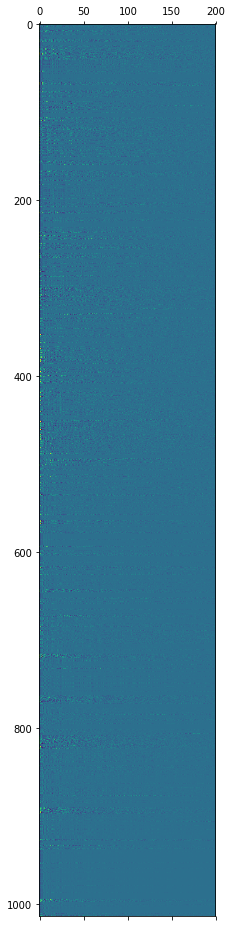

In [17]:
print('numero alunos', Y.shape[0])

print('numero alunos aprovados', np.sum(Y))


from sklearn.decomposition import pca
pca = PCA(n_components=200)
pca.fit(X)

print(pca.explained_variance_ratio_)  
X = pca.transform(X)

plt.matshow(X)




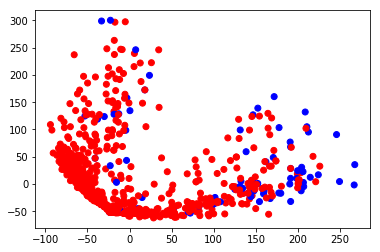

In [18]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X[:,0],X[:,1], c=Y,cmap=cm_bright)

In [19]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [85]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(10),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



In [95]:
    
    X = StandardScaler().fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=42)
    
    
    
    
    
    
    

Temos que balancear as classes
(copiar amostras 1 10 vezes no dado)

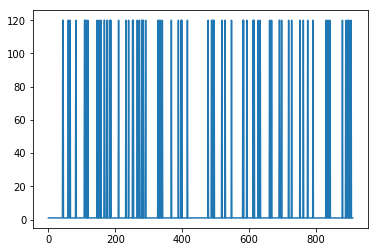

In [96]:
 # iterate over classifiers
    
sample_weight = np.array(Y_train)
sample_weight[sample_weight==1]=120
sample_weight[sample_weight==0]=1

plt.plot(sample_weight)


In [99]:
classifiers[6].fit(X_train, Y_train)
score = classifiers[6].score(X_test, Y_test,sample_weight=sample_weight)
score

TypeError: Axis must be specified when shapes of a and weights differ.

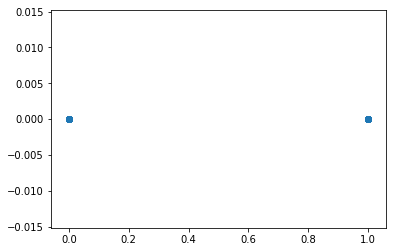

In [98]:
yhat = classifiers[0].predict(X_test)

plt.scatter(Y_test,yhat)



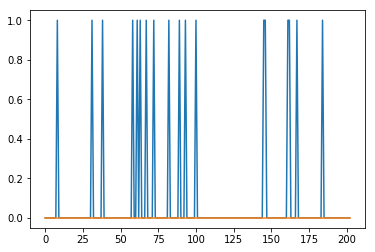

In [92]:
plt.plot(Y_test)
plt.plot(yhat)





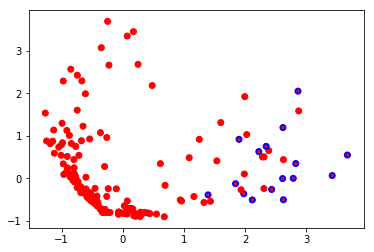

In [93]:

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_test[:,0],X_test[:,1], c=Y_test,cmap=cm_bright)
plt.scatter(X_test[:,0],X_test[:,1], s=5,c=yhat.ravel(),cmap=cm_bright)